<a href="https://colab.research.google.com/github/yeondubudu/-/blob/main/(%EA%B3%B5%EC%9C%A0)%EB%8C%80%EC%A4%91_%EC%88%98%EC%B6%9C%EC%9E%85_%EB%B9%84%EC%A4%91_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요할법한 라이브러리들 일단 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (40.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and direc

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#1. 관세청_품목별 국가별 수출입실적 파일에서 중국 국가 데이터 불러오기

In [ ]:
# 관세청_품목별 국가별 수출입실적(중국)(2018~2024)

import requests
import xml.etree.ElementTree as ET
import pandas as pd

DATA_years = []
startyear = 2018
endyear = 2024
params ={'balPayments': 0,
    'expDlr': 0,
    'expWgt': 0,
    'hsCd': 0,
    'impDlr': 0,
    'impWgt': 0,
    'statCd': "string",
    'statCdCntnKor1': "string",
    'statKor': "string",
    'year': "string"}
service_key = "6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D"

for year in range(startyear, endyear+1):
    base_url = f"http://apis.data.go.kr/1220000/nitemtrade/getNitemtradeList?strtYymm={year}01&endYymm={year}12&cntyCd=CN&serviceKey={service_key}"

    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.request.url}")
    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        items = root.findall(".//item")
        all_data = []
        for item in items:
            data = {child.tag: child.text for child in item}
            all_data.append(data)

        # 확인용 출력
        for i, item in enumerate(all_data):
            print(f"[{i+1}]")
            for k, v in item.items():
                print(f"{k}: {v}")
            print("-" * 30)

        for item in root.findall('.//item'):
            row = {
                'balPayments': item.findtext('balPayments'),
                'expDlr': item.findtext('expDlr'),
                'expWgt': item.findtext('expWgt'),
                'hsCd': item.findtext('hsCd'),
                'impDlr': item.findtext('impDlr'),
                'impWgt': item.findtext('impWgt'),
                'statCd': item.findtext('statCd'),
                'statCdCntnKor1': item.findtext('statCdCntnKor1'),
                'statKor': item.findtext('statKor'),
                'year': item.findtext('year'),
            }
            DATA_years.append(row)

df = pd.DataFrame(DATA_years)
print(df)
df.to_csv('중국 품목별 수출입실적(2018~2024).csv', index=False, encoding='utf-8-sig')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
statCd: CN
statCdCntnKor1: 중국
statKor: 저항계
year: 2024.12
------------------------------
[93239]
balPayments: 6090
expDlr: 6592
expWgt: 81
hsCd: 9030396000
impDlr: 502
impWgt: 8
statCd: CN
statCdCntnKor1: 중국
statKor: 주파수 측정기
year: 2024.12
------------------------------
[93240]
balPayments: -8117657
expDlr: 212401
expWgt: 454
hsCd: 9030399000
impDlr: 8330058
impWgt: 584859
statCd: CN
statCdCntnKor1: 중국
statKor: 기타
year: 2024.12
------------------------------
[93241]
balPayments: -95966
expDlr: 310511
expWgt: 150
hsCd: 9030400000
impDlr: 406477
impWgt: 556
statCd: CN
statCdCntnKor1: 중국
statKor: 전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk meter)ㆍ게인측정계(gain measuring instrument)ㆍ만곡률계(distortion factor meter)ㆍ잡음전압계(psophometer)]
year: 2024.12
------------------------------
[93242]
balPayments: 20926155
expDlr: 21057026
expWgt: 338995
hsCd: 9030820000
impDlr: 130871
impWgt: 733
statCd: CN
statCdCntnKor1: 중국
statKor: 반도체 웨이퍼나 소자(집적회로를 포함한다)의 측정용이나 검사용
year: 20

#2. 관세청_품목별 국가별 수출입실적 파일에서 미국 국가 데이터 불러오기

In [ ]:
# 관세청_품목별 국가별 수출입실적(미국)(2018~2024)

import requests
import xml.etree.ElementTree as ET
import pandas as pd

DATA_years = []
startyear = 2018
endyear = 2024
params ={'balPayments': 0,
    'expDlr': 0,
    'expWgt': 0,
    'hsCd': 0,
    'impDlr': 0,
    'impWgt': 0,
    'statCd': "string",
    'statCdCntnKor1': "string",
    'statKor': "string",
    'year': "string"}
service_key = "6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D"

for year in range(startyear, endyear+1):
    base_url = f"http://apis.data.go.kr/1220000/nitemtrade/getNitemtradeList?strtYymm={year}01&endYymm={year}12&cntyCd=US&serviceKey={service_key}"

    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.request.url}")
    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        items = root.findall(".//item")
        all_data = []
        for item in items:
            data = {child.tag: child.text for child in item}
            all_data.append(data)

        # 확인용 출력
        for i, item in enumerate(all_data):
            print(f"[{i+1}]")
            for k, v in item.items():
                print(f"{k}: {v}")
            print("-" * 30)

        for item in root.findall('.//item'):
            row = {
                'balPayments': item.findtext('balPayments'),
                'expDlr': item.findtext('expDlr'),
                'expWgt': item.findtext('expWgt'),
                'hsCd': item.findtext('hsCd'),
                'impDlr': item.findtext('impDlr'),
                'impWgt': item.findtext('impWgt'),
                'statCd': item.findtext('statCd'),
                'statCdCntnKor1': item.findtext('statCdCntnKor1'),
                'statKor': item.findtext('statKor'),
                'year': item.findtext('year'),
            }
            DATA_years.append(row)

df = pd.DataFrame(DATA_years)
print(df)
df.to_csv('미국 품목별 수출입실적(2018~2024).csv', index=False, encoding='utf-8-sig')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
statCd: US
statCdCntnKor1: 미국
statKor: 굴절계
year: 2024.12
------------------------------
[77673]
balPayments: -7726
expDlr: 1683
expWgt: 33
hsCd: 9027503000
impDlr: 9409
impWgt: 11
statCd: US
statCdCntnKor1: 미국
statKor: 비색계
year: 2024.12
------------------------------
[77674]
balPayments: 19736
expDlr: 21247
expWgt: 35
hsCd: 9027504000
impDlr: 1511
impWgt: 0
statCd: US
statCdCntnKor1: 미국
statKor: 조도계
year: 2024.12
------------------------------
[77675]
balPayments: -11201844
expDlr: 1086541
expWgt: 1699
hsCd: 9027509000
impDlr: 12288385
impWgt: 15186
statCd: US
statCdCntnKor1: 미국
statKor: 기타
year: 2024.12
------------------------------
[77676]
balPayments: -2839052
expDlr: 0
expWgt: 0
hsCd: 9027810000
impDlr: 2839052
impWgt: 5571
statCd: US
statCdCntnKor1: 미국
statKor: 질량분석기
year: 2024.12
------------------------------
[77677]
balPayments: -4025642
expDlr: 1466405
expWgt: 25784
hsCd: 9027891000
impDlr: 5492047
impWgt: 8965
statCd: US
statCdCntnKor1: 미국

# 3. 관세청_품목별 데이터 불러오기

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

DATA_years = []
startyear = 2018
endyear = 2024
params = {'balPayments': 0,
    'expDlr': 0,
    'expWgt': 0,
    'hsCode': 0,
    'impDlr': 0,
    'impWgt': 0,
    'statKor': "string",
    'year': "string"}
service_key = "6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D"

for year in range(startyear, endyear+1):
    base_url =f"https://apis.data.go.kr/1220000/Itemtrade/getItemtradeList?serviceKey={service_key}&strtYymm={year}01&endYymm={year}12"

    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.request.url}")
    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        items = root.findall(".//item")
        all_data = []
        for item in items:
            data = {child.tag: child.text for child in item}
            all_data.append(data)

        # 확인용 출력
        for i, item in enumerate(all_data):
            print(f"[{i+1}]")
            for k, v in item.items():
                print(f"{k}: {v}")
            print("-" * 30)

        for item in root.findall('.//item'):
            row = {
                'balPayments': item.findtext('balPayments'),
                'expDlr': item.findtext('expDlr'),
                'expWgt': item.findtext('expWgt'),
                'hsCode': item.findtext('hsCode'),
                'impDlr': item.findtext('impDlr'),
                'impWgt': item.findtext('impWgt'),
                'statKor': item.findtext('statKor'),
                'year': item.findtext('year'),
            }
            DATA_years.append(row)

df = pd.DataFrame(DATA_years)
print(df)
df.to_csv('관세청_품목별 수출입실적(2018~2024).csv', index=False, encoding='utf-8-sig')

SSLError: HTTPSConnectionPool(host='apis.data.go.kr', port=443): Max retries exceeded with url: /1220000/Itemtrade/getItemtradeList?serviceKey=6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D&strtYymm=201801&endYymm=201812&balPayments=0&expDlr=0&expWgt=0&hsCode=0&impDlr=0&impWgt=0&statKor=string&year=string (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_ILLEGAL_PARAMETER] sslv3 alert illegal parameter (_ssl.c:1016)')))

# 4. step1: 중국 수출 비중 구하기(대 중국 수출 금액 / 대 전국가 수출 금액)
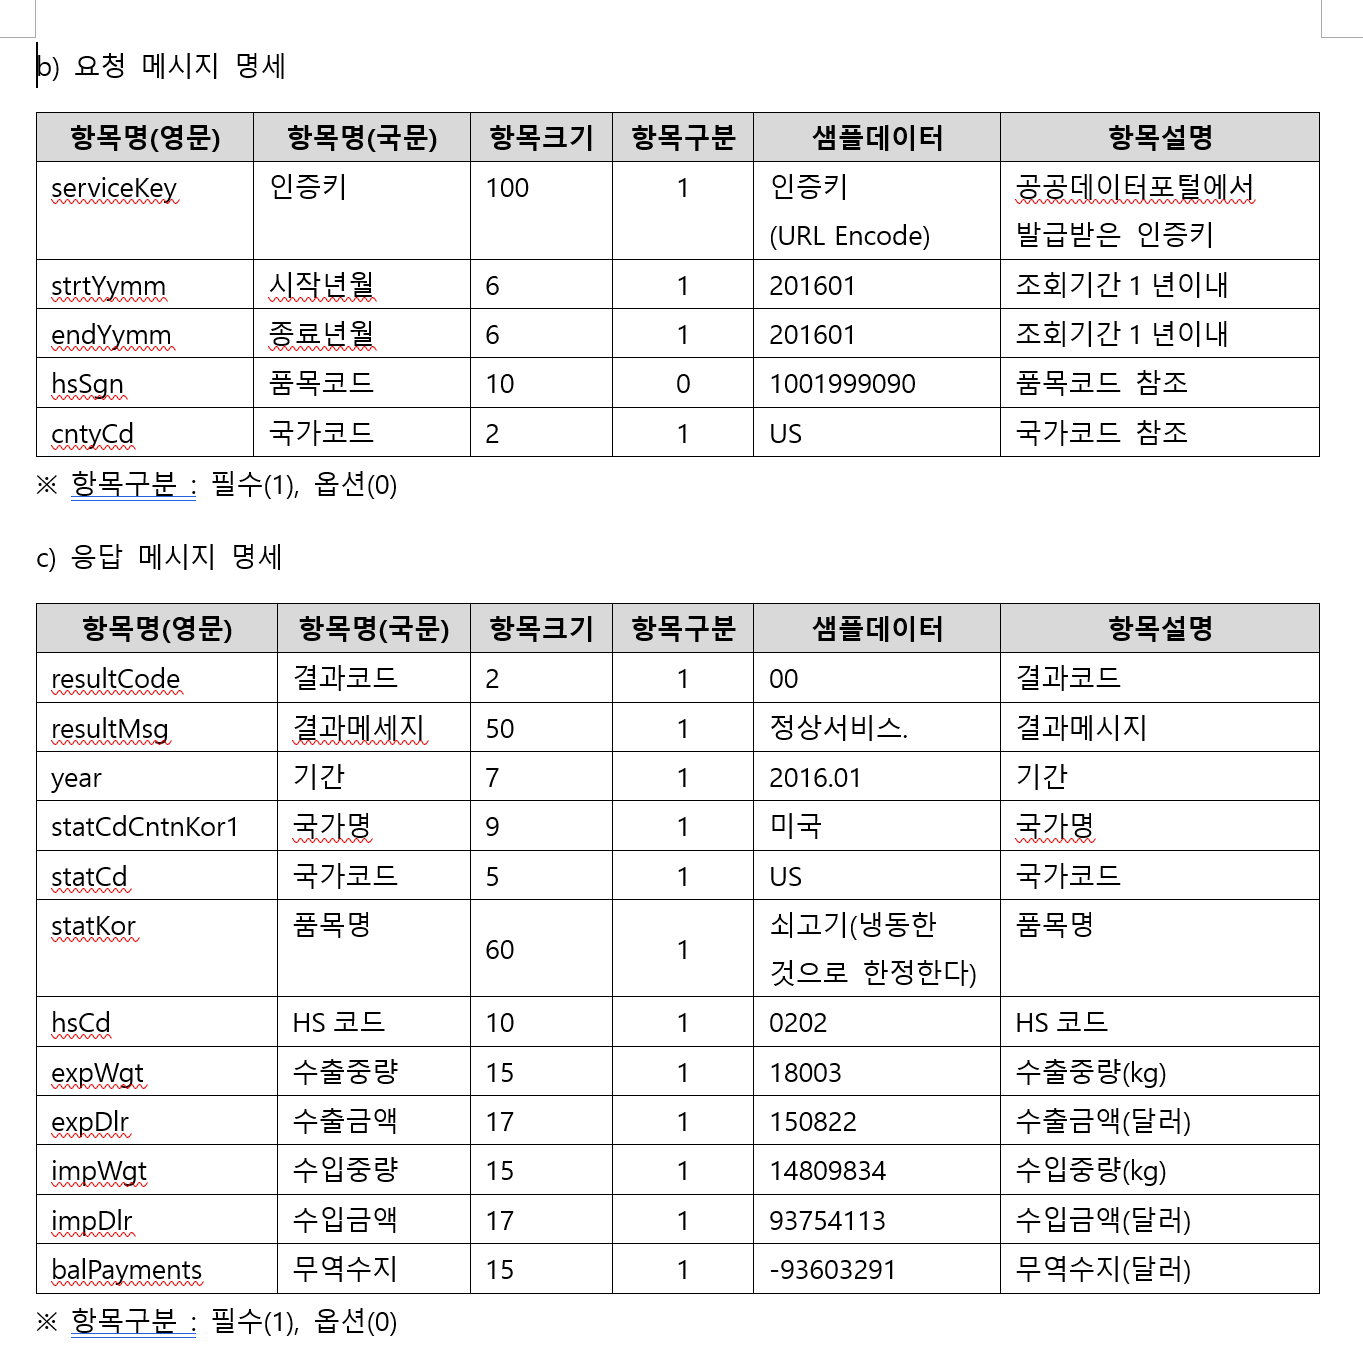

1. 요청 메시지
- serviceKey	인증키
- strtYymm	시작년월
- endYymm	종료년월
- hsSgn	품목코드
- cntyCd	국가코드

2. 응답 메시지
- resultCode	결과코드
- resultMsg	결과메세지
- year	기간
- statCdCntnKor1	국가명
- statCd	국가코드
- statKor	품목명
- hsCd	HS코드
- expWgt	수출중량
- expDlr	수출금액
- impWgt	수입중량
- impDlr	수입금액
- balPayments	무역수지



In [ ]:
# 대중 수출 데이터 및 대전세계 데이터 불러오기
df_total = pd.read_csv("/content/관세청_품목별 수출입실적(2018-2024).csv", encoding='utf-8', low_memory=False)
df_china = pd.read_csv("/content/중국 품목별 수출입실적(2018-2024).csv", encoding='utf-8', low_memory=False)

In [ ]:
# 대 전세계 수출 데이터
df_total.isnull().sum()

,0
무역수지,0
수출금액,0
수출중량,0
HS코드,0
수입금액,0
수입중량,0
품목명,0
기간,0


In [ ]:
# 대 전세계 수출 데이터 hscode 개수
print(df_total['hsCode'].nunique())     #13331개
print(df_total['hsCode'].value_counts().sort_index())

13331
hsCode
-              7
0101211000    17
0101219000    44
0101291000    79
0101299000    66
              ..
9706902000    36
9706903000    36
9999999286     1
9999999287     1
9999999290    76
Name: count, Length: 13331, dtype: int64


In [ ]:
# 대 중국 수출 데이터 확인
df_china

,balPayments,expDlr,expWgt,hsCd,impDlr,impWgt,statCd,statCdCntnKor1,statKor,year
0,55636463595,162125055391,47258762042,-,106488591796,36289340107,-,-,-,총계
1,51219,51219,150,0106110000,0,0,CN,중국,영장류,2018.01
2,-32702,0,0,0106149000,32702,827,CN,중국,기타,2018.01
3,-110545,0,0,0106191000,110545,715,CN,중국,개,2018.01
4,-243652,0,0,0106199000,243652,750,CN,중국,기타,2018.01
...,...,...,...,...,...,...,...,...,...,...
646125,-2280,0,0,9705310000,2280,1,CN,중국,제작 후 100년을 초과한 것,2024.12
646126,7577,17936,200,9706101000,10359,9,CN,중국,도자기류,2024.12
646127,-5051,0,0,9706103000,5051,6,CN,중국,기타,2024.12
646128,-54,0,0,9706901000,54,5,CN,중국,도자기류,2024.12


In [ ]:
# 대 중국 수출 데이터의 hscode 개수
df_china['hsCd'].nunique()   #12212개
df_china['hsCd'].value_counts().sort_index()

,count
hsCd,
-,7
0101211000,3
0101219000,1
0101309000,2
0101900000,1
...,...
9706103000,5
9706901000,30
9706902000,2


In [ ]:
# df_total은 변수 이름이 hsCode / df_china는 변수 이름이 hsCd
# 둘 중 하나의 이름 변경 필요(통일 필요)

In [ ]:
# 변수 이름 바꾸기

# 기존 변수 이름과 새 변수 이름 매칭
rename_dict = {
    'balPayments': '무역수지',
    'expDlr': '수출금액',
    'expWgt': '수출중량',
    'hsCode': 'HS코드',
    'hsCd' : 'HS코드',
    'statCd': '국가코드',
    'statCdCntnKor1': '국가명',
    'impDlr': '수입금액',
    'impWgt': '수입중량',
    'statKor': '품목명',
    'year': '기간'
}

# 변수 이름 변경
df_china.rename(columns=rename_dict, inplace=True)
df_total.rename(columns=rename_dict, inplace=True)

# 결과 출력 (변경된 변수 이름)
print(df_china)
print(df_total)


               무역수지          수출금액         수출중량        HS코드          수입금액  \
0       55636463595  162125055391  47258762042           -  106488591796   
1             51219         51219          150  0106110000             0   
2            -32702             0            0  0106149000         32702   
3           -110545             0            0  0106191000        110545   
4           -243652             0            0  0106199000        243652   
...             ...           ...          ...         ...           ...   
646125        -2280             0            0  9705310000          2280   
646126         7577         17936          200  9706101000         10359   
646127        -5051             0            0  9706103000          5051   
646128          -54             0            0  9706901000            54   
646129         -536             0            0  9706903000           536   

               수입중량 국가코드 국가명               품목명       기간  
0       36289340107    -   - 

In [ ]:
# 중국 수출 비중 계산하기

# 연도 문자열 변환
df_total['기간'] = df_total['기간'].astype(str)
df_china['기간'] = df_china['기간'].astype(str)

# 전체 고유 HS코드 확보
all_hscodes = sorted(df_total['HS코드'].dropna().unique())

# 결과 저장용 리스트
result_dfs = []

# 연도 및 월 루프
for year in range(2018, 2025):
    for month in range(1, 13):
        yyyymm = f"{year}.{month:02d}"

        # 월별 필터링
        total_month = df_total[df_total['기간'] == yyyymm]
        china_month = df_china[df_china['기간'] == yyyymm]

        # 월별 집계
        total_grouped = (
            total_month.groupby('HS코드', as_index=False)['수출금액']
            .sum()
            .rename(columns={'수출금액': '전체_수출금액'})
        )
        china_grouped = (
            china_month.groupby('HS코드', as_index=False)['수출금액']
            .sum()
            .rename(columns={'수출금액': '대중_수출금액'})
        )

        # 전체 HS코드 기준으로 누락된 항목 보완
        df_all_codes = pd.DataFrame({'HS코드': all_hscodes})

        # 병합: total, china 수출액
        merged = pd.merge(df_all_codes, total_grouped, on='HS코드', how='left')
        merged = pd.merge(merged, china_grouped, on='HS코드', how='left')

        # NaN 값 처리
        merged['전체_수출금액'] = merged['전체_수출금액'].fillna(0)
        merged['대중_수출금액'] = merged['대중_수출금액'].fillna(0)

        # 중국 수출 비중 계산
        merged['대중_수출비율'] = merged['대중_수출금액'] / merged['전체_수출금액']
        merged['대중_수출비율'] = merged['대중_수출비율'].replace([float('inf')], 0)

        # 연월 컬럼 추가
        merged['year'] = year
        merged['month'] = month

        # 결과 누적
        result_dfs.append(merged)

# 모든 결과 결합
final_df = pd.concat(result_dfs, ignore_index=True)
final_df
# 저장
# final_df.to_csv('/content/월별 HS코드별 중국 수출 비중(2018~2024).csv', index=False, encoding='utf-8-sig')

,HS코드,전체_수출금액,대중_수출금액,대중_수출비율,year,month
0,-,0.0,0.0,NaN,2018,1
1,0101211000,0.0,0.0,NaN,2018,1
2,0101219000,0.0,0.0,NaN,2018,1
3,0101291000,143776.0,0.0,0.0,2018,1
4,0101299000,0.0,0.0,NaN,2018,1
...,...,...,...,...,...,...
1119799,9706902000,34.0,0.0,0.0,2024,12
1119800,9706903000,75.0,0.0,0.0,2024,12
1119801,9999999286,0.0,0.0,NaN,2024,12
1119802,9999999287,0.0,0.0,NaN,2024,12


In [ ]:
# 위의 코드가 정확한지 확인하기

# 2018년 1월 데이터 필터링
january_2018 = final_df[(final_df['year'] == 2019) & (final_df['month'] == 12)]

# 결과 출력
january_2018

,HS코드,전체_수출금액,대중_수출금액,대중_수출비율,year,month
306613,-,0.0,0.0,NaN,2019,12
306614,0101211000,0.0,0.0,NaN,2019,12
306615,0101219000,0.0,0.0,NaN,2019,12
306616,0101291000,288835.0,0.0,0.0,2019,12
306617,0101299000,0.0,0.0,NaN,2019,12
...,...,...,...,...,...,...
319939,9706902000,0.0,0.0,NaN,2019,12
319940,9706903000,0.0,0.0,NaN,2019,12
319941,9999999286,0.0,0.0,NaN,2019,12
319942,9999999287,0.0,0.0,NaN,2019,12


In [ ]:
final_df['HS코드'].value_counts().sort_index()

,count
HS코드,
-,84
0101211000,84
0101219000,84
0101291000,84
0101299000,84
...,...
9706902000,84
9706903000,84
9999999286,84


In [ ]:
# china_ratio가 NaN도 아니고 0도 아닌 값만 필터링
china_ratio_non_zero = final_df[(final_df['대중_수출비율'].notna()) & (final_df['대중_수출비율'] != 0)]

# 결과 출력
china_ratio_non_zero

,HS코드,전체_수출금액,대중_수출금액,대중_수출비율,year,month
24,0106110000,51219.0,51219.0,1.000000,2018,1
81,0206299000,73200.0,73200.0,1.000000,2018,1
124,0210201000,2594.0,2594.0,1.000000,2018,1
174,0302210000,427279.0,11365.0,0.026599,2018,1
175,0302220000,7029.0,7029.0,1.000000,2018,1
...,...,...,...,...,...,...
1119752,9620000000,238601.0,3021.0,0.012661,2024,12
1119762,9701911000,9710212.0,387531.0,0.039910,2024,12
1119766,9701990000,385851.0,143.0,0.000371,2024,12
1119780,9703901000,5972780.0,147581.0,0.024709,2024,12


## 1) 산업군별 수출 비중 시각화

In [ ]:
import matplotlib.pyplot as plt

# 2018~2024년 데이터 필터링
filtered_df = final_df[(final_df['year'] >= 2018) & (final_df['year'] <= 2024)]

# HS코드별 중국 수출 비중 계산
hs_code_ratio = (
    filtered_df.groupby('HS코드', as_index=False)
    .agg({'대중_수출비율': 'mean'})  # 각 HS코드에 대해 중국 수출 비중 평균 계산
)

# hs_code_ratio[hs_code_ratio["대중_수출비율"].isnull()]

# NaN 값을 제거
hs_code_ratio = hs_code_ratio.dropna(subset=['대중_수출비율'])


# 시각화: 중국 수출 비중을 HS코드별로 막대그래프
plt.figure(figsize=(12, 6))
plt.bar(hs_code_ratio['HS코드'].astype(str), hs_code_ratio['대중_수출비율'], color='blue')

# 그래프 꾸미기
plt.title('HS코드별 평균 중국 수출 비중 (2018-2024)', fontsize=14)
plt.xlabel('HS코드', fontsize=12)
plt.ylabel('중국 수출 비중', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()

# 그래프 출력
plt.show()


,HS코드,대중_수출비율
0,-,NaN
1,0101211000,NaN
9,0102299000,NaN
10,0102399000,NaN
11,0103100000,NaN
...,...,...
13292,9701920000,NaN
13314,9705210000,NaN
13328,9999999286,NaN
13329,9999999287,NaN


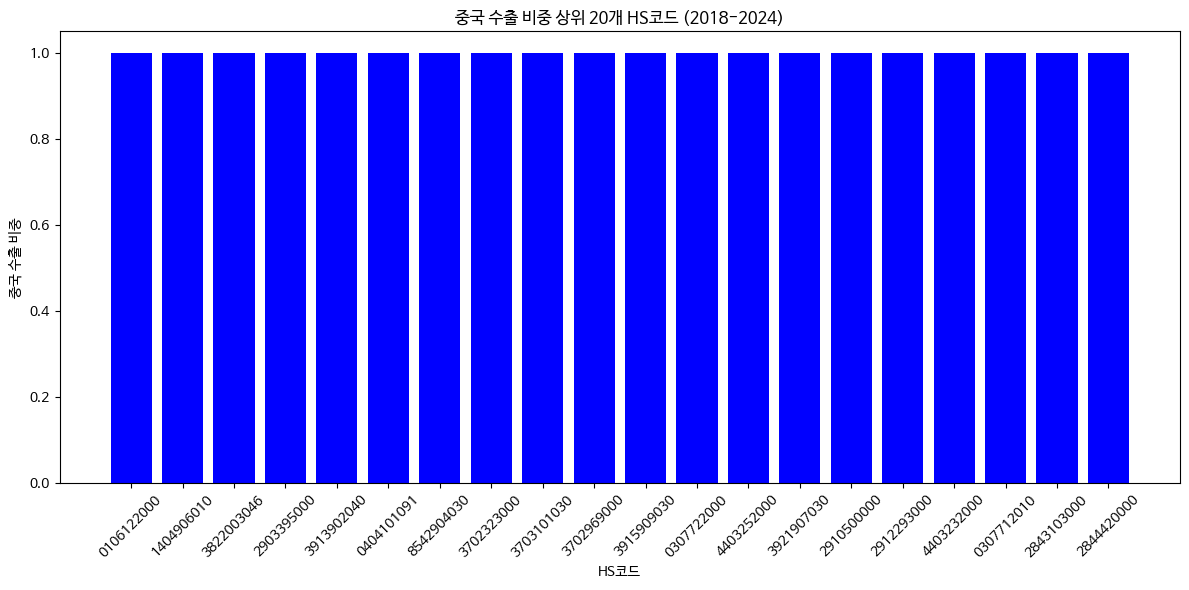

In [ ]:
# 비중 높은 상위 20개 HS코드만 추출
top_hs = hs_code_ratio.sort_values(by='대중_수출비율', ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_hs['HS코드'].astype(str), top_hs['대중_수출비율'], color='blue')
plt.title('중국 수출 비중 상위 20개 HS코드 (2018-2024)')
plt.xlabel('HS코드')
plt.ylabel('중국 수출 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2) HS코드별 중국 수출 비중 분포 시각화

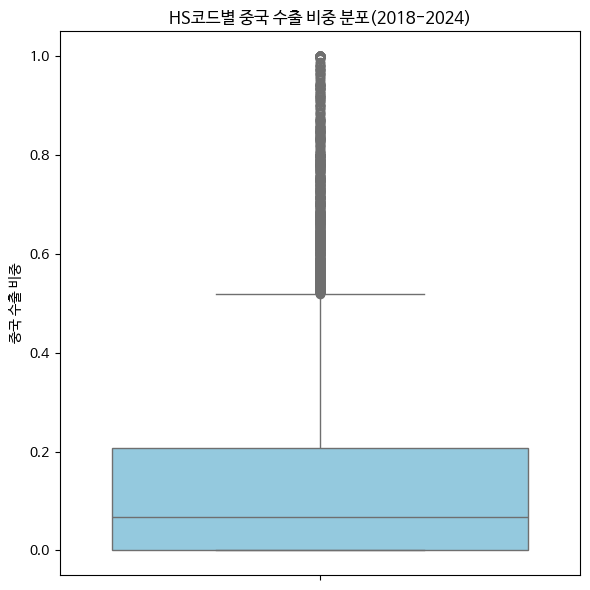

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=hs_code_ratio, y='대중_수출비율', color='skyblue')
plt.title('HS코드별 중국 수출 비중 분포(2018-2024)')
plt.ylabel('중국 수출 비중')
plt.tight_layout()
plt.show()

# 그림을 보면 대부분의 HS코드는 중국 수출 비중이 낮고
# 중앙값이 약 0.07로 절반 이상이 중국 비중 10% 미만
# 허나 일부 품목은 중국 의존도가 매우 높다 -> 수출비중 0.5188~1 사이에 있는 이상치 점들이 고의존 품목군에 해당할 듯?
# 정책적으로 중국 리스크에 매우 민감한 군으로 분류 가능
# -> 분포의 비대칭성이 매우 크다
# 왼쪽에 치우침, 오른쪽 꼬리 김 -> 소수 품목이 중국에 매우 집중

# 이상치를 중국비중이 0.5188 이상인 품목군으로 나눠서 고의존 고위험군 후보로
# 중앙선 이하는 일반 또는 저의존군 나눔
# 0.5188 이상 / 0.2081~0.5188 / 0.2081 이하

In [ ]:
# 필요한 통계값 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
median = hs_code_ratio['대중_수출비율'].median()
iqr = q3 - q1
mean_value = hs_code_ratio['대중_수출비율'].mean()
median_value = hs_code_ratio['대중_수출비율'].median()

# 이상치 기준점 (상한선)
upper_bound = q3 + 1.5 * iqr

# 출력
print(f"1사분위수 (Q1): {q1:.4f}")
print(f"중앙값 (Median): {median:.4f}")
print(f"3사분위수 (Q3): {q3:.4f}")
print(f"IQR (Q3 - Q1): {iqr:.4f}")
print(f"이상치 기준 상한선 (Q3 + 1.5*IQR): {upper_bound:.4f}")
print("HS코드별 중국 수출 비중 중앙값:", round(median_value, 4))
print("HS코드별 중국 수출 비중 평균값:", round(mean_value, 4))

1사분위수 (Q1): 0.0010
중앙값 (Median): 0.0680
3사분위수 (Q3): 0.2081
IQR (Q3 - Q1): 0.2071
이상치 기준 상한선 (Q3 + 1.5*IQR): 0.5188
HS코드별 중국 수출 비중 중앙값: 0.068
HS코드별 중국 수출 비중 평균값: 0.1478


In [ ]:
# Q1, Q3, IQR 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] > upper_bound]

# 이상치 개수 출력
print("이상치로 판단되는 HS코드 수:", len(outliers))


이상치로 판단되는 HS코드 수: 831


In [ ]:
print("전체 대비 이상치 비율:", round(len(outliers) / len(hs_code_ratio) * 100, 2), "%")

전체 대비 이상치 비율: 6.73 %


In [ ]:
# 이상치 정의: 중국 수출 비중이 0.5349 이상인 HS코드
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] >= upper_bound ]

# 결과 미리보기
outliers.sort_values(by='대중_수출비율', ascending=False).head(10)  # 상위 10개

# 저장 (필요 시)
# outliers.to_csv('중국고의존_HS코드_리스트.csv', index=False, encoding='utf-8-sig')

,HS코드,대중_수출비율
12263,8905905000,1.0
11772,8542904030,1.0
445,0306149010,1.0
543,0307712010,1.0
550,0307722000,1.0
9256,8112994000,1.0
9011,7501209010,1.0
8164,7005298010,1.0
1310,1211501000,1.0
1231,1202301000,1.0


## 3) 이상치 개수 및 비율 -> 고위험군 후보

In [ ]:
############이걸로 보기!#################

# 데이터 불러오기
df = pd.read_csv("월별 HS코드별 중국 수출 비중(2018~2024).csv", encoding='utf-8')

# 2018~2023년 평균값 계산 (HS코드별로)
hs_code_ratio = (
    df[(df['year'] >= 2018) & (df['year'] <= 2024)]
    .groupby('HS코드', as_index=False)
    .agg({'대중_수출비율': 'mean'})
)

# 사분위수 및 이상치 기준 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"Q1 (25%): {q1:.4f}")
print(f"Q3 (75%): {q3:.4f}")
print(f"IQR: {iqr:.4f}")
print(f"이상치 기준 (Q3 + 1.5*IQR): {upper_bound:.4f}")

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] > upper_bound]

# 이상치 개수 및 비율
num_outliers = len(outliers)
total = len(hs_code_ratio)
ratio_outliers = round(num_outliers / total * 100, 2)

print(f"\n이상치로 분류된 HS코드 수: {num_outliers}개")
print(f"전체 HS코드 중 이상치 비율: {ratio_outliers}%")

# 이상치 리스트 저장 (선택)
outliers.to_csv("중국수출비중_이상치_HS코드리스트.csv", index=False, encoding='utf-8-sig')


Q1 (25%): 0.0010
Q3 (75%): 0.2081
IQR: 0.2071
이상치 기준 (Q3 + 1.5*IQR): 0.5188

이상치로 분류된 HS코드 수: 831개
전체 HS코드 중 이상치 비율: 6.23%


# step2: 중국 수출 비중 데이터에서 HS 앞 4자리로 군집화

In [ ]:
### 이거 참고하기 STEP2 아래 코드 다 잘못된 것

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime
pd.set_option('display.max_columns', None)

#%%
# 1. Load Data
df = pd.read_csv("월별 HS코드별 중국 수출 비중(HS 4자리 new).csv", encoding='utf-8', low_memory=False)

# 2. 연도(year)와 HS4 코드별로 그룹화하여 전체 및 대중 수출금액의 합계를 계산
grouped_df = df.groupby(['year', 'HS4'])[['대중_수출금액', '전체_수출금액']].sum().reset_index()

# 3. 대중_수출비율 계산
grouped_df['대중_수출비율'] = grouped_df['대중_수출금액'] / grouped_df['전체_수출금액']

# 4. 대중_수출비율 nan 값을 filtering 하지 않은 데이터프레임 저장
grouped_df.to_csv('연도_HS4_수출금액합계_수출비율 (without filtering nan).csv', index=False, encoding='utf-8-sig')

# 5. 대중_수출비율 nan 값을 filtering 하고 데이터프레임 저장
filtered_grouped_df = grouped_df.dropna(subset=['대중_수출비율'])
filtered_grouped_df.to_csv('연도_HS4_수출금액합계_수출비율 (with filtering nan).csv', index=False, encoding='utf-8-sig')

# After removing nan values, 8617-8381=236 rows are dropped


In [ ]:
df = pd.read_csv("월별 HS코드별 중국 수출 비중(2018~2024).csv", encoding='utf-8')

# 1. HS 앞 4자리 추출
df['HS4'] = df['HS코드'].astype(str).str[:4]

# 2. 필요한 열만 선택 (year, month, china_ratio, hs4)
df_hs4_grouped = (
    df.groupby(['year', 'month', 'HS4'], as_index=False)['대중_수출비율']
    .mean()  # 또는 .sum() if needed
)

# 3. 확인
print(df_hs4_grouped)
# df_hs4_grouped.to_csv("월별 HS코드별 중국 수출 비중(HS 4자리).csv", index=False, encoding='utf-8-sig')

        year  month   HS4   대중_수출비율
0       2018      1     -       NaN
1       2018      1  0101  0.000000
2       2018      1  0102       NaN
3       2018      1  0103       NaN
4       2018      1  0104       NaN
...      ...    ...   ...       ...
103483  2024     12  9703  0.012354
103484  2024     12  9704  0.000000
103485  2024     12  9705  0.000000
103486  2024     12  9706  0.322404
103487  2024     12  9999       NaN

[103488 rows x 4 columns]


In [ ]:
# HS4 컬럼의 문자열 길이 계산 (NaN은 제외됨)
df_hs4_grouped['HS4_length'] = df_hs4_grouped['HS4'].astype(str).str.len()

# 결과 미리보기
print(df_hs4_grouped[['HS4', 'HS4_length']])

         HS4  HS4_length
0          -           1
1       0101           4
2       0102           4
3       0103           4
4       0104           4
...      ...         ...
103483  9703           4
103484  9704           4
103485  9705           4
103486  9706           4
103487  9999           4

[103488 rows x 2 columns]


In [ ]:
# 문자열 길이 계산
df_hs4_grouped['HS4_length'] = df_hs4_grouped['HS4'].astype(str).str.len()

# 글자 수 별 개수 세기
length_counts = df_hs4_grouped['HS4_length'].value_counts().sort_index()
print(length_counts)

# - 삭제해야함

HS4_length
1        84
4    103404
Name: count, dtype: int64


In [ ]:
# '-'인 HS4 값 제거
df_hs4_grouped_clean = df_hs4_grouped[df_hs4_grouped['HS4'] != '-']

# 결과 확인
print(df_hs4_grouped_clean[['HS4','대중_수출비율']])

# 다시 저장
df_hs4_grouped_clean.to_csv("월별 HS코드별 중국 수출 비중(HS 4자리).csv", index=False, encoding='utf-8-sig')

         HS4   대중_수출비율
1       0101  0.000000
2       0102       NaN
3       0103       NaN
4       0104       NaN
5       0105       NaN
...      ...       ...
103483  9703  0.012354
103484  9704  0.000000
103485  9705  0.000000
103486  9706  0.322404
103487  9999       NaN

[103404 rows x 2 columns]


<ipython-input-29-703bd9fa5722>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_hs4 = df_hs4_grouped[(final_df['year'] >= 2018) & (final_df['year'] <= 2024)]


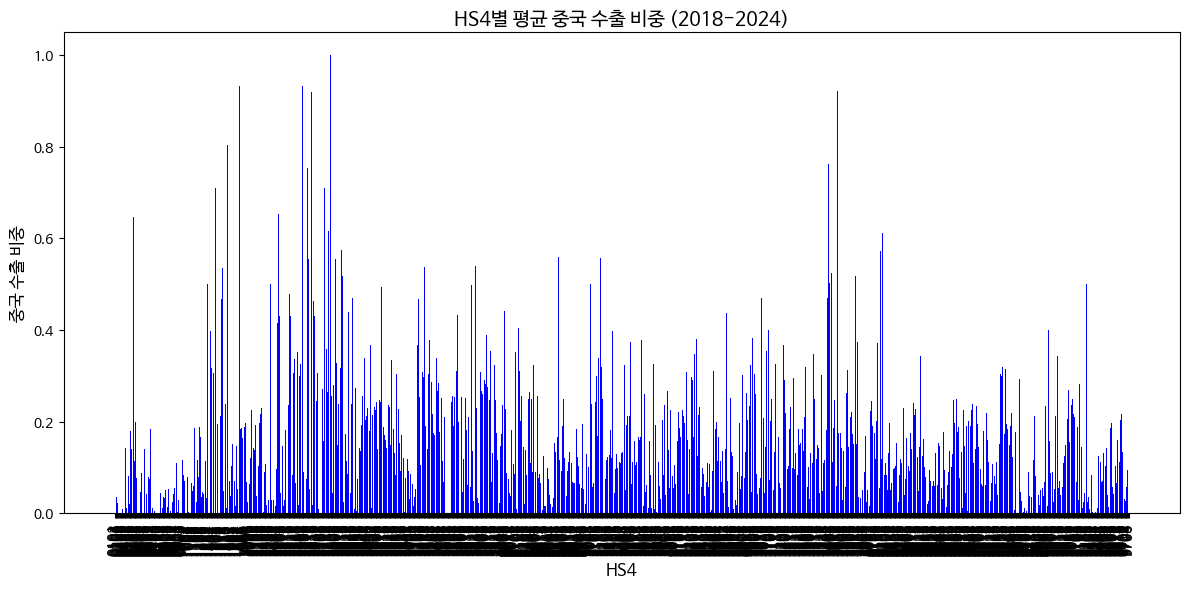

In [ ]:
# 2018~2024년 데이터 필터링
filtered_df_hs4 = df_hs4_grouped[(final_df['year'] >= 2018) & (final_df['year'] <= 2024)]

# HS코드별 중국 수출 비중 계산
hs_code_ratio = (
    filtered_df_hs4.groupby('HS4', as_index=False)
    .agg({'대중_수출비율': 'mean'})  # 각 HS4에 대해 중국 수출 비중 평균 계산
)

# NaN 값을 제거
hs_code_ratio = hs_code_ratio.dropna(subset=['대중_수출비율'])

# 시각화: 중국 수출 비중을 HS코드별로 막대그래프
plt.figure(figsize=(12, 6))
plt.bar(hs_code_ratio['HS4'].astype(str), hs_code_ratio['대중_수출비율'], color='blue')

# 그래프 꾸미기
plt.title('HS4별 평균 중국 수출 비중 (2018-2024)', fontsize=14)
plt.xlabel('HS4', fontsize=12)
plt.ylabel('중국 수출 비중', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()

# 그래프 출력
plt.show()


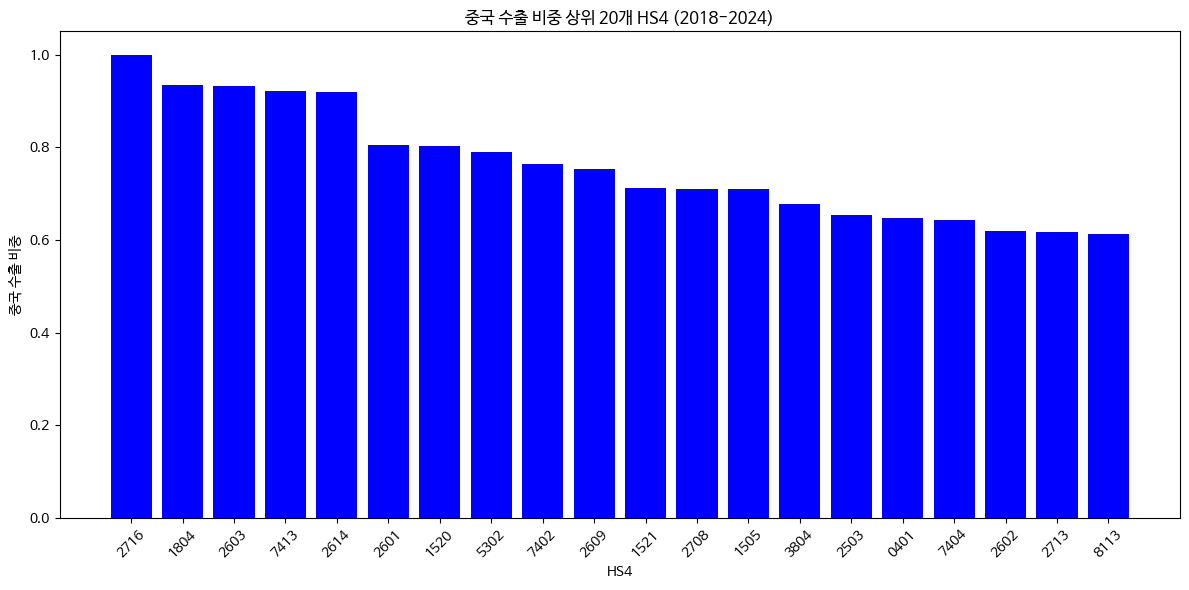

In [ ]:
# 비중 높은 상위 20개 HS코드만 추출
top_hs = hs_code_ratio.sort_values(by='대중_수출비율', ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_hs['HS4'].astype(str), top_hs['대중_수출비율'], color='blue')
plt.title('중국 수출 비중 상위 20개 HS4 (2018-2024)')
plt.xlabel('HS4')
plt.ylabel('중국 수출 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


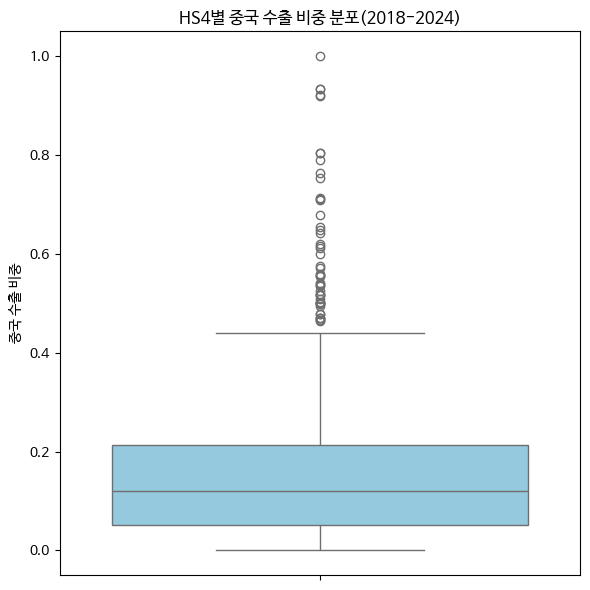

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=hs_code_ratio, y='대중_수출비율', color='skyblue')
plt.title('HS4별 중국 수출 비중 분포(2018-2024)')
plt.ylabel('중국 수출 비중')
plt.tight_layout()
plt.show()

# 그림을 보면 대부분의 HS코드는 중국 수출 비중이 낮고
# 중앙값이 약 0.1204로 절반 이상이 중국 비중 12%
# 허나 일부 품목은 중국 의존도가 매우 높다 -> 수출비중 0.4568~1 사이에 있는 이상치 점들이 고의존 품목군에 해당할 듯?
# 정책적으로 중국 리스크에 매우 민감한 군으로 분류 가능
# 품목별이랑 뭐가 다른지 설명

# 이상치를 중국비중이 0.4568 이상인 품목군으로 나눠서 고의존 고위험군 후보로
# 중앙선 이하는 일반 또는 저의존군 나눔
# 0.4568 이상 / 0.21314~0.4568 / 0.2131 이하

In [ ]:
# 필요한 통계값 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
median = hs_code_ratio['대중_수출비율'].median()
iqr = q3 - q1
mean_value = hs_code_ratio['대중_수출비율'].mean()
median_value = hs_code_ratio['대중_수출비율'].median()

# 이상치 기준점 (상한선)
upper_bound = q3 + 1.5 * iqr

# 출력
print(f"1사분위수 (Q1): {q1:.4f}")
print(f"중앙값 (Median): {median:.4f}")
print(f"3사분위수 (Q3): {q3:.4f}")
print(f"IQR (Q3 - Q1): {iqr:.4f}")
print(f"이상치 기준 상한선 (Q3 + 1.5*IQR): {upper_bound:.4f}")
print("HS4별 중국 수출 비중 중앙값:", round(median_value, 4))
print("HS4별 중국 수출 비중 평균값:", round(mean_value, 4))

1사분위수 (Q1): 0.0506
중앙값 (Median): 0.1204
3사분위수 (Q3): 0.2131
IQR (Q3 - Q1): 0.1625
이상치 기준 상한선 (Q3 + 1.5*IQR): 0.4568
HS4별 중국 수출 비중 중앙값: 0.1204
HS4별 중국 수출 비중 평균값: 0.1534


In [ ]:
# Q1, Q3, IQR 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] > upper_bound]

# 이상치 개수 출력
print("이상치로 판단되는 HS4 수:", len(outliers))


이상치로 판단되는 HS4 수: 52


In [ ]:
print("전체 대비 이상치 비율:", round(len(outliers) / len(hs_code_ratio) * 100, 2), "%")

전체 대비 이상치 비율: 4.24 %


In [ ]:
# 이상치 정의: 중국 수출 비중이 0.4568 이상인 HS4
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] >= upper_bound ]

# 결과 미리보기
outliers.sort_values(by='대중_수출비율', ascending=False).head(10)  # 상위 10개

# 저장 (필요 시)
outliers.to_csv('중국고의존_HS4_리스트.csv', index=False, encoding='utf-8-sig')

In [ ]:
############이걸로 보기!#################

# 데이터 불러오기
df = pd.read_csv("월별 HS코드별 중국 수출 비중(HS 4자리).csv", encoding='utf-8')

# 2018~2023년 평균값 계산 (HS4별로)
hs_code_ratio = (
    df[(df['year'] >= 2018) & (df['year'] <= 2024)]
    .groupby('HS4', as_index=False)
    .agg({'대중_수출비율': 'mean'})
)

# 사분위수 및 이상치 기준 계산
q1 = hs_code_ratio['대중_수출비율'].quantile(0.25)
q3 = hs_code_ratio['대중_수출비율'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"Q1 (25%): {q1:.4f}")
print(f"Q3 (75%): {q3:.4f}")
print(f"IQR: {iqr:.4f}")
print(f"이상치 기준 (Q3 + 1.5*IQR): {upper_bound:.4f}")

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['대중_수출비율'] > upper_bound]

# 이상치 개수 및 비율
num_outliers = len(outliers)
total = len(hs_code_ratio)
ratio_outliers = round(num_outliers / total * 100, 2)

print(f"\n이상치로 분류된 HS코드 수: {num_outliers}개")
print(f"전체 HS4 중 이상치 비율: {ratio_outliers}%")

# 이상치 리스트 저장 (선택)
outliers.to_csv("중국수출비중_이상치_HS4_리스트.csv", index=False, encoding='utf-8-sig')


Q1 (25%): 0.0506
Q3 (75%): 0.2131
IQR: 0.1625
이상치 기준 (Q3 + 1.5*IQR): 0.4568

이상치로 분류된 HS코드 수: 52개
전체 HS4 중 이상치 비율: 4.22%


In [ ]:
# 자 그럼 이제 해야할 게

# 음

# 대중 수출 비중을 구했지. 그리고 대중 수출 비중이 높은 품목(hscode)이 뭔지도 알 수 있어.
# 박스플랏을 봤을 때, 대부분의 품목은 중국 수출 의존도가 높지 않지만,
# 이상치가 6.12%로로 존재해.

# 이 hs코드는 품목 기준표니까 일단 산업으로 묶어야할 것 같고
# 산업으로 묶는 거에서 끝나면 안 되고

# 무역보험 청구 파일이 업종별(ksic)로 되어있으니까

# 이 무보 파일의 업종과 중국 수출 의존도의 산업을 1대1 매칭을 시켜야하지

# 그치

# 음

# 아씨머리아프네 인터넷에 매칭 기준이 있긴 있던데 중요한건
# 1대1 매칭이 아름답게 이뤄지지 않는다느거지

# 합리적인 기준을 세워서 일단 여차저차 매칭하고

# --> hs코드 기준 파일 받았으니

# '산업별 중국 수출 비중'파일 hs코드 앞 4자리만 따고
# '무역보험 파일'이랑 hs코드 기준으로 합쳐야겠다.



# 해야할거는

# 중국 수출의존도가 높은 산업과 무역보험 청구율 간의 상관관계를 파악해야하지.

# 근데 이제

# 미중 무역 갈등의 변동성이 심할수록 이라는 시계열 데이터가 들어가지

# 이것도 18-24 산업별 월별 관세율 데이터가 있으면 너무나도 좋겠네

# 산업별을 구할 수 없으면 고냥 저번에 찾았던 월별 관세율 데이터 써야겠구망

# 아.......

# 현주야 머리좀 굴려봐 제발

# 관세 데이터 / 보험 데이터 / 대중 수출 비율 데이터

# 전처리된 것들이 이렇게 있다고 하고

# 산업별, 연도 기준으로 합치고

# 다중회귀분석 돌리고 가설 검정하고 p-vaule 등등


# step3: 중국 수출 비중 데이터(hs4)와 무역보험 데이터 병합

In [ ]:
insurance = pd.read_excel('/content/수출상품별 인수실적 및 보험금 지급현황(2018-2024년, HS CODE 4자리 기준)(수정본).xlsx')
china_ratio = pd.read_csv('/content/월별 HS코드별 중국 수출 비중(HS 4자리).csv')

In [ ]:
insurance

,기준년도,HS CODE,품목명,인수건수,원화보험금액,지급건수,원화지급금액
0,2018년,0013,NaN,240,7108848000,0,0
1,2018년,0029,NaN,9,15480260000,0,0
2,2018년,006,NaN,36,0,0,0
3,2018년,0203,"돼지고기(신선한 것, 냉장하거나 냉동한 것으로 한정한다)",3,18825000,0,0
4,2018년,0301,활어,95,6739383000,0,0
...,...,...,...,...,...,...,...
5306,2024년,S750,NaN,12,782014000,0,0
5307,2024년,S760,NaN,1142,147243594000,1,271691640
5308,2024년,S770,NaN,1,11482000,0,0
5309,2024년,S790,NaN,95,118208216000,0,0


In [ ]:
# HS CODE를 문자열로 변환한 뒤 길이 계산
insurance['HS CODE'] = insurance['HS CODE'].astype(str)
insurance['HS_CODE_LENGTH'] = insurance['HS CODE'].apply(len)

# 자릿수별 개수 확인 (예: 3자리 몇 개, 4자리 몇 개...)
length_counts = insurance['HS_CODE_LENGTH'].value_counts().sort_index()

# 결과 출력
print(length_counts)


HS_CODE_LENGTH
3      16
4    5295
Name: count, dtype: int64


In [ ]:
china_ratio

,year,month,HS4,대중_수출비율,HS4_length
0,2018,1,101,0.000000,4
1,2018,1,102,NaN,4
2,2018,1,103,NaN,4
3,2018,1,104,NaN,4
4,2018,1,105,NaN,4
...,...,...,...,...,...
103399,2024,12,9703,0.012354,4
103400,2024,12,9704,0.000000,4
103401,2024,12,9705,0.000000,4
103402,2024,12,9706,0.322404,4


In [ ]:
# 기준년도에서 '년' 제거 후 정수형으로 변환
insurance['기준년도'] = insurance['기준년도'].str.replace('년', '').astype(int)

In [ ]:
# 1. 연도별로 합치기

# 2. 컬럼명 통일
insurance = insurance.rename(columns={
    '기준년도': '기준연도',
    'HS CODE': 'HS CODE(4자리)'
})
china_ratio = china_ratio.rename(columns={
    'year': '기준연도',
    'month': 'month',
    'HS4': 'HS CODE(4자리)',
 })

# 3. 코드 앞 4자리 통일
insurance['HS CODE(4자리)'] = insurance['HS CODE(4자리)'].astype(str).str[:4]

# 5. 데이터 타입 통일
insurance['기준연도'] = insurance['기준연도'].astype(str)
insurance['HS CODE(4자리)'] = insurance['HS CODE(4자리)'].astype(str)
china_ratio['기준연도'] = china_ratio['기준연도'].astype(str)
china_ratio['HS CODE(4자리)'] = china_ratio['HS CODE(4자리)'].astype(str)

# 6. 합집합 기준 병합 (outer join)
merged_union = pd.merge(insurance, china_ratio, how='outer',
                        on=['기준연도', 'HS CODE(4자리)'])

# 7. 결과 확인
print("병합 후 행 개수:", len(merged_union))
print("고유 HS CODE 수:", merged_union['HS CODE(4자리)'].nunique())
print(merged_union)

# 저장
merged_union.to_csv("보험_수출비중_합집합_병합결과.csv", index=False)

병합 후 행 개수: 103678
고유 HS CODE 수: 1289
        기준연도 HS CODE(4자리)  품목명      인수건수        원화보험금액   지급건수        원화지급금액  \
0       2018            -  NaN       NaN           NaN    NaN           NaN   
1       2018            -  NaN       NaN           NaN    NaN           NaN   
2       2018            -  NaN       NaN           NaN    NaN           NaN   
3       2018            -  NaN       NaN           NaN    NaN           NaN   
4       2018            -  NaN       NaN           NaN    NaN           NaN   
...      ...          ...  ...       ...           ...    ...           ...   
103673  2024         S750  NaN      12.0  7.820140e+08    0.0  0.000000e+00   
103674  2024         S760  NaN    1142.0  1.472436e+11    1.0  2.716916e+08   
103675  2024         S770  NaN       1.0  1.148200e+07    0.0  0.000000e+00   
103676  2024         S790  NaN      95.0  1.182082e+11    0.0  0.000000e+00   
103677  2024         값 없음  NaN  369564.0  2.970382e+13  245.0  1.119149e+10   

        HS_COD

In [ ]:
merged_union = merged_union.drop(columns=[ 'month','HS_CODE_LENGTH','month'])

In [ ]:
merged_union

,기준연도,HS CODE(4자리),품목명,인수건수,원화보험금액,지급건수,원화지급금액,대중_수출비율
0,2018,-,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,-,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,-,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,-,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,-,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
103673,2024,S750,NaN,12.0,7.820140e+08,0.0,0.000000e+00,NaN
103674,2024,S760,NaN,1142.0,1.472436e+11,1.0,2.716916e+08,NaN
103675,2024,S770,NaN,1.0,1.148200e+07,0.0,0.000000e+00,NaN
103676,2024,S790,NaN,95.0,1.182082e+11,0.0,0.000000e+00,NaN


In [ ]:
# 문자열 또는 정수 형태로 되어 있을 수 있으니 일단 문자열로 통일
# merged_union['기준연도'] = merged_union['기준연도'].astype(str)

# 2018년도 데이터만 필터링
df_2018 = merged_union[merged_union['기준연도'] == '2018']

# 결과 미리보기
print(df_2018)
print(f"2018년 데이터 행 수: {len(df_2018)}")

       기준연도 HS CODE(4자리)  품목명     인수건수        원화보험금액   지급건수        원화지급금액  \
0      2018            -  NaN      NaN           NaN    NaN           NaN   
1      2018            -  NaN      NaN           NaN    NaN           NaN   
2      2018            -  NaN      NaN           NaN    NaN           NaN   
3      2018            -  NaN      NaN           NaN    NaN           NaN   
4      2018            -  NaN      NaN           NaN    NaN           NaN   
...     ...          ...  ...      ...           ...    ...           ...   
14793  2018         9999  NaN  16016.0  1.222970e+12   51.0  3.298526e+10   
14794  2018         9999  NaN  16016.0  1.222970e+12   51.0  3.298526e+10   
14795  2018         9999  NaN  16016.0  1.222970e+12   51.0  3.298526e+10   
14796  2018         AB01  NaN      2.0  0.000000e+00    0.0  0.000000e+00   
14797  2018         값 없음  NaN  84590.0  2.333973e+13  165.0  8.054314e+09   

       HS_CODE_LENGTH  대중_수출비율  
0                 NaN      NaN  
1        

In [ ]:
merged_union['청구율'] = merged_union.apply(
    lambda row: row['지급건수'] / row['인수건수'] if row['인수건수'] > 0 else 0,
    axis=1
)

merged_union[merged_union["청구율"]>1]

,기준연도,HS CODE(4자리),품목명,인수건수,원화보험금액,지급건수,원화지급금액,대중_수출비율,청구율
13103,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.310373,5.0
13104,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.310898,5.0
13105,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.354513,5.0
13106,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.242377,5.0
13107,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.193045,5.0
13108,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.319991,5.0
13109,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.121346,5.0
13110,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.142147,5.0
13111,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.165449,5.0
13112,2018,8548,기기의 전기식 부분품(이 류에 따로 분류되지 않은 것으로 한정한다),1.0,18936000.0,5.0,8.916533e+06,0.136478,5.0


In [ ]:
print(merged_union)

        기준연도 HS CODE(4자리)  품목명      인수건수        원화보험금액   지급건수        원화지급금액  \
0       2018            -  NaN       NaN           NaN    NaN           NaN   
1       2018            -  NaN       NaN           NaN    NaN           NaN   
2       2018            -  NaN       NaN           NaN    NaN           NaN   
3       2018            -  NaN       NaN           NaN    NaN           NaN   
4       2018            -  NaN       NaN           NaN    NaN           NaN   
...      ...          ...  ...       ...           ...    ...           ...   
103673  2024         S750  NaN      12.0  7.820140e+08    0.0  0.000000e+00   
103674  2024         S760  NaN    1142.0  1.472436e+11    1.0  2.716916e+08   
103675  2024         S770  NaN       1.0  1.148200e+07    0.0  0.000000e+00   
103676  2024         S790  NaN      95.0  1.182082e+11    0.0  0.000000e+00   
103677  2024         값 없음  NaN  369564.0  2.970382e+13  245.0  1.119149e+10   

        대중_수출비율       청구율  
0           NaN  0.0000

In [ ]:
# 데이터 개수 및 기초 통계 확인
print(merged_union[['대중_수출비율', '청구율']].describe())

# NaN 개수 확인
print("대중_수출비율 NaN 개수:", merged_union['대중_수출비율'].isna().sum())
print("청구율 NaN 개수:", merged_union['청구율'].isna().sum())

# 값이 모두 같은지 확인
print("청구율 고유값:", merged_union['청구율'].nunique())
print("수출비중 고유값:", merged_union['대중_수출비율'].nunique())


            대중_수출비율            청구율
count  93914.000000  103678.000000
mean       0.154016       0.003404
std        0.185996       0.074408
min        0.000000       0.000000
25%        0.003357       0.000000
50%        0.102034       0.000000
75%        0.227000       0.000000
max        1.000000       5.000000
대중_수출비율 NaN 개수: 9764
청구율 NaN 개수: 0
청구율 고유값: 830
수출비중 고유값: 71410


청구율 > 0인 경우 상관계수: -0.052862170412398705


<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-3b5bc1de3522>:15: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

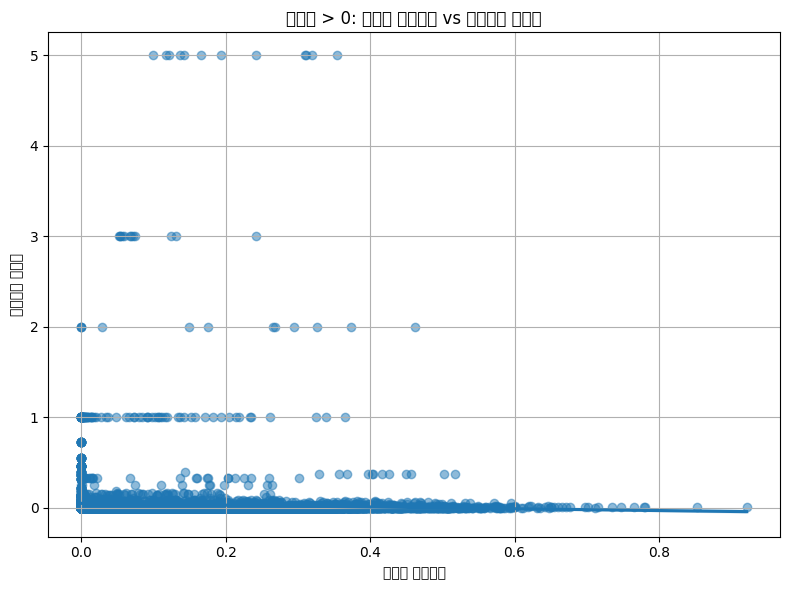

In [ ]:
# 청구율 > 0인 데이터만 필터링
filtered = merged_union[merged_union['청구율'] > 0]

# 상관계수 계산
correlation_filtered = filtered[['대중_수출비율', '청구율']].corr().iloc[0, 1]
print("청구율 > 0인 경우 상관계수:", correlation_filtered)

# 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='대중_수출비율', y='청구율', scatter_kws={'alpha':0.5})
plt.title('청구율 > 0: 대중국 수출비율 vs 무역보험 청구율')
plt.xlabel('대중국 수출비율')
plt.ylabel('무역보험 청구율')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
merged_union['HS_CODE_LENGTH'].value_counts().sort_index()

,count
HS_CODE_LENGTH,
3.0,16
4.0,61626


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime
pd.set_option('display.max_columns', None)


#%%
df_total = pd.read_excel("수출상품별 인수실적 및 보험금 지급현황(2018-2024년, HS CODE 4자리 기준)(수정본).xlsx")

# X, Y, Z에 실제 데이터(리스트 또는 NumPy 배열)를 넣어주세요.
X = df_total["인수건수"]+df_total["지급건수"]
Y = df_total["원화보험금액"]
# Z = df_total[""]

data = pd.DataFrame({'X': X, 'Y': Y})
correlation_matrix = data.corr()

print(correlation_matrix)

#%%
plt.scatter(X,Y)
plt.show()

#%%
df_total = pd.read_excel("수출상품별 인수실적 및 보험금 지급현황(2018-2024년, HS CODE 4자리 기준)(수정본).xlsx")

# X, Y, Z에 실제 데이터(리스트 또는 NumPy 배열)를 넣어주세요.
X = df_total["인수건수"]+df_total["지급건수"]
Y = df_total["원화보험금액"]
h = plt.hist(Y)
plt.title('Distribution of Y')
plt.show()
print(h)

outlier_line = 60000
idx = (X <= outlier_line) & (Y>0)
X = X[idx]
Y = Y[idx]

data = pd.DataFrame({'X': X, 'Y': Y})
correlation_matrix = data.corr()

print(correlation_matrix)

plt.scatter(X,Y)
plt.title(f'After removing outliers (X={outlier_line})')
plt.show()
